# **Manzanas Buenas y Malas**  🍎

## **Recolectar datos**

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df1 = pd.read_csv('apple_quality.csv')
df1.head()


,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


## **Procesar datos**

Cambiando los nombres de las columnas al español:

* A_id -> id
* Size -> tamaño
* Weight -> peso
* Sweetness -> dulzura
* Crunchiness -> crijiente
* Juiciness -> jugosidad
* Ripeness -> madurez
* Acidity -> acidez
* Quality -> calidad

In [3]:
df = df1.copy()
df.columns=['id', 'tamaño', 'peso', 'dulzura', 'crujiente', 'jugosidad', 'madurez', 'acidez', 'calidad' ]
df.head(2)

,id,tamaño,peso,dulzura,crujiente,jugosidad,madurez,acidez,calidad
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


Analizar cantidad de datos

In [4]:
print('Columnas a analizar:', df.shape[1])
print('Filas a analizar:', df.shape[0])

Columnas a analizar: 9
Filas a analizar: 4001


Borrando las columnas no necesarias para nuestro analisis

Columna id

In [5]:
df2 = df.drop(columns=['id'])
df2.head()

,tamaño,peso,dulzura,crujiente,jugosidad,madurez,acidez,calidad
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


Verificando si tiene vlores null

In [6]:
des = df2.describe()
des.loc['Nan'] = df2.isna().sum()
des

,tamaño,peso,dulzura,crujiente,jugosidad,madurez
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837
Nan,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


creando copia del df2 y borrar los valores null

In [7]:
#borrando los valores null
df3 = df2.dropna()
#verificando que se borró correctamente
df3.isna().sum()

tamaño       0
peso         0
dulzura      0
crujiente    0
jugosidad    0
madurez      0
acidez       0
calidad      0
dtype: int64

In [8]:
df3.head()

,tamaño,peso,dulzura,crujiente,jugosidad,madurez,acidez,calidad
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


## **Explorar datos**

explorar las relaciones entre todos los feauters

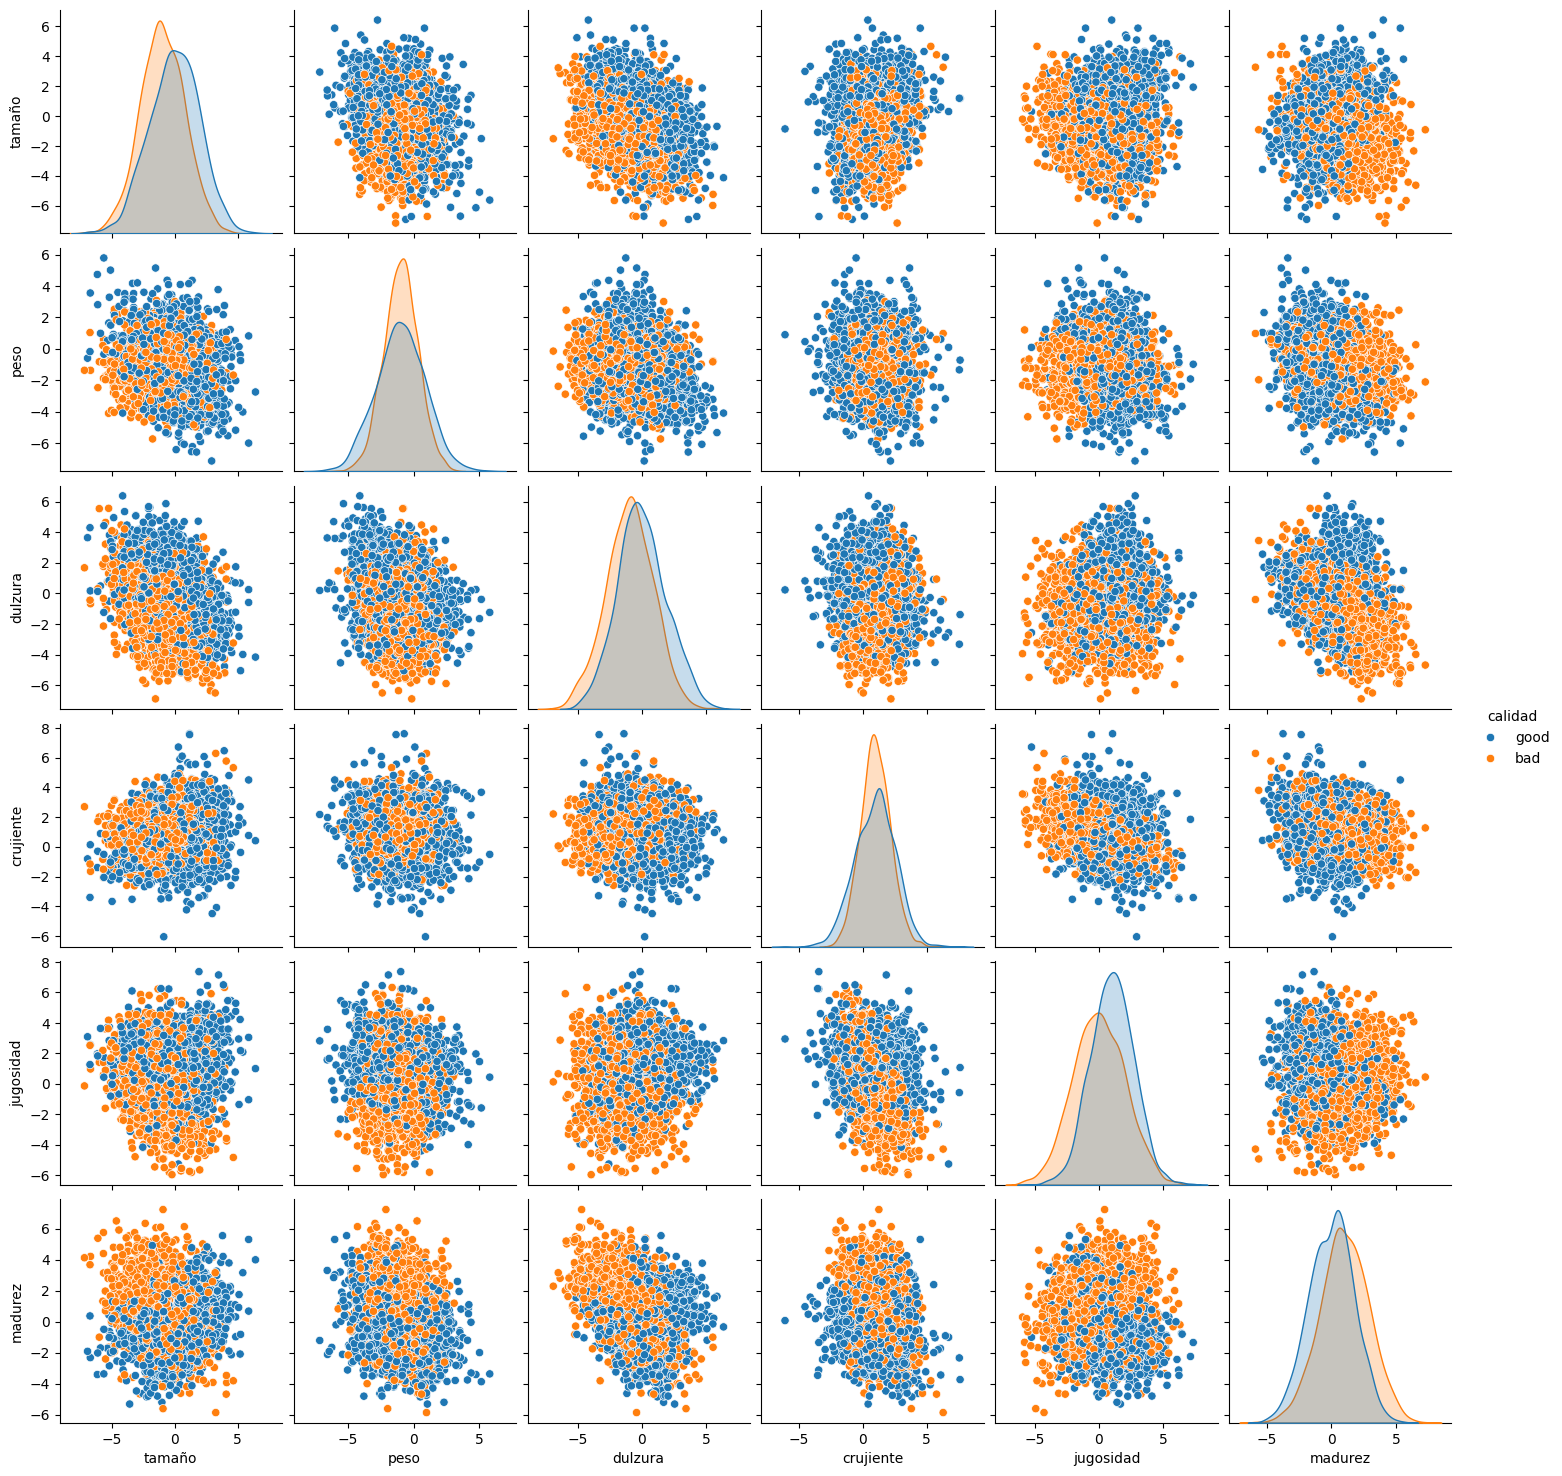

In [9]:
sns.pairplot(df3, hue= 'calidad')

## **Entrenar modelo**

una vez teniando todos los datos necesarios para saber si una manzana esta buena o no, Procedemos a hacer el modelo

creando los datos de entrada y salida

In [10]:
#Datos de entrada
X=df3.drop('calidad', axis=1).values
#Datos de salida
y= df3['calidad']

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

Entrenando algunos modelos

Support Vector Machines (SVC)


In [12]:
from sklearn.svm import SVC
svc = SVC()
#entreno el modelo
svc = svc.fit(X_train, y_train)
y_hat_svc = svc.predict(X_test)

Decision Tree

In [13]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc = dtc.fit(X_train, y_train)
y_hat_dtc= dtc.predict(X_test)

Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=5, criterion='entropy', max_depth=5)
rf = rf.fit(X_train, y_train)
y_hat_rf = rf.predict(X_test)

## **Validar modelos**

In [15]:
from sklearn.metrics import accuracy_score
print('Exactitud modelo SVM:', accuracy_score(y_test, y_hat_svc, normalize=True))
print('Exactitud modelo Decision Tree:', accuracy_score(y_test, y_hat_dtc, normalize=True))
print('Exactitud modelo Random Forest:', accuracy_score(y_test, y_hat_rf, normalize=True))

Exactitud modelo SVM: 0.8983333333333333
Exactitud modelo Decision Tree: 0.7908333333333334
Exactitud modelo Random Forest: 0.7825


Podemos ver que el modelo con mas exactitud es SVM

matriz confusion

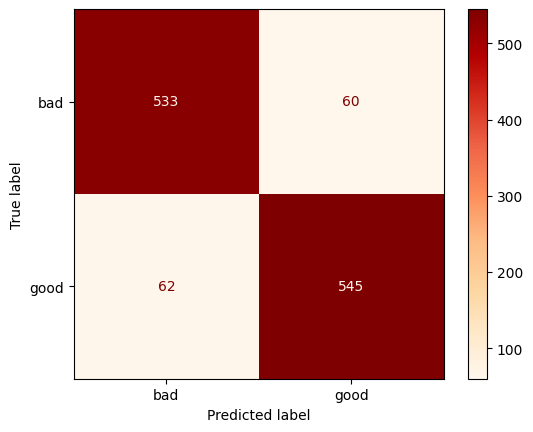

In [16]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm= confusion_matrix(y_test, y_hat_svc)
cmd= ConfusionMatrixDisplay(cm, display_labels= svc.classes_)
cmd.plot(cmap=plt.cm.OrRd)
plt.show()

## **Utilizar Modelo**

In [17]:
df3.head(2)

,tamaño,peso,dulzura,crujiente,jugosidad,madurez,acidez,calidad
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.32984,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.86753,-0.722809367,good


In [18]:
def predecir(tamaño, peso, dulzura, crujiente, jugosidad,madurez, acidez):
    df_prueba= pd.DataFrame({'tamaño': [tamaño], 'peso': [peso],
                           'dulzura': [dulzura], 'crujiente': [crujiente],
                           'jugosidad': [jugosidad], 'madurez': [madurez],
                           'acidez': [acidez]})
    X_prueba = df_prueba.values
    y_hat_prueba = svc.predict(X_prueba)
    if y_hat_prueba == ['good']:
      print('La calidad de tu manzana es buena')
    else:
      print('La calidad de tu manzana es mala')
    return

In [19]:
predecir(-1.843261, -2.312385, 5.100293, 2.423734, 1.582239, 0.543233, 0.421216453)

La calidad de tu manzana es buena
